<a href="https://colab.research.google.com/github/AdamPoi/PCVK/blob/main/PCVK_week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Kelompok Minggu 5

## Anggota Kelompok 4
1. **Nama:** Adam Rafi Rezandi
   - **NIM:** 2141720185
   - **NO:** 02
   
2. **Nama:** Maulana Arif Wijaya
   - **NIM:** 2141720085
   - **NO:** 16

3. **Nama:** Mochamad Driya Ananta
   - **NIM:** 2141720085
   - **NO:** 17

# MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Maskin


# Tugas Praktikum
1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

In [98]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
import glob

In [99]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


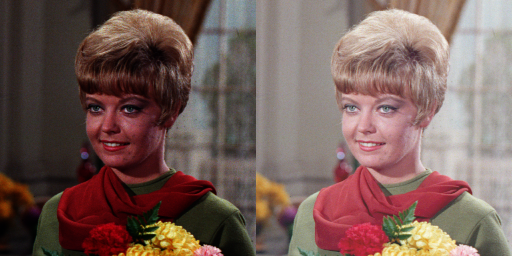

In [100]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
gamma_img = np.zeros(original.shape,original.dtype)
# tambah putih 1/gamma
# tambah hitam gamma
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_img[y,x,c]=np.clip(255*pow(original[y,x,c]/255,1/gamma),0,255)

final_frame = cv.hconcat((original, gamma_img))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.

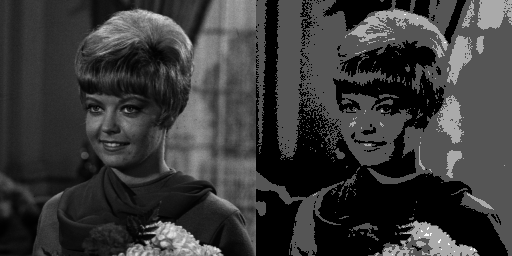

In [101]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff',cv.IMREAD_GRAYSCALE)
depth_img = np.zeros(original.shape,original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      depth_img[y,x]=np.clip(round(original[y,x]/level)*level,0,255)

final_frame = cv.hconcat((original, depth_img))
cv2_imshow(final_frame)

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

In [102]:
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
   n = cv.imread(img)
   cv_img.append(n)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

## Menggunakan rumus PSNR

In [103]:
def PSNR(original, compressed):
  mse = np.mean((original - compressed) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

def avg_psnr(original, noises):
  denoising_avg = np.mean(noises, axis=0).astype(np.uint8)

  psnr = PSNR(original,denoising_avg)
  cv2_imshow(denoising_avg)
  print(f'Jumlah citra : {len(noises)}')
  print(f'Total PSNR rumus: {psnr} dB')
  print(f'Total PSNR library: {cv.PSNR(original,denoising_avg)} dB')
  print(f'{"="*50}\n')

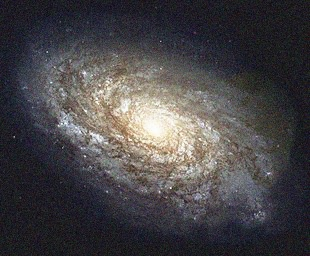

Jumlah citra : 5
Total PSNR rumus: 27.541765881308695 dB
Total PSNR library: 19.522047857621484 dB



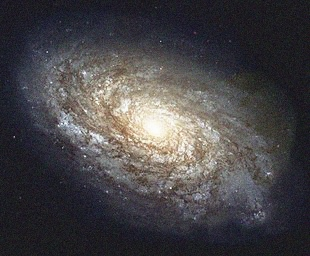

Jumlah citra : 10
Total PSNR rumus: 27.543794450326633 dB
Total PSNR library: 19.72913290714254 dB



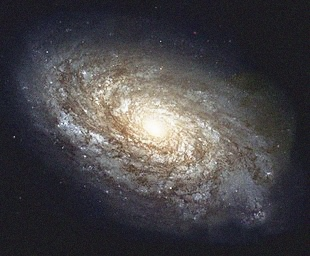

Jumlah citra : 20
Total PSNR rumus: 27.51364282928753 dB
Total PSNR library: 19.83709453564903 dB



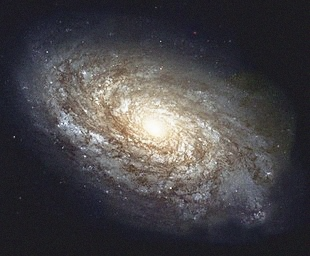

Jumlah citra : 40
Total PSNR rumus: 27.459849646323843 dB
Total PSNR library: 19.888725270934955 dB



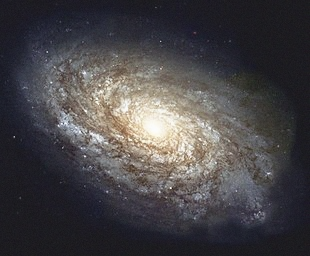

Jumlah citra : 60
Total PSNR rumus: 27.42613959805016 dB
Total PSNR library: 19.908005582238538 dB



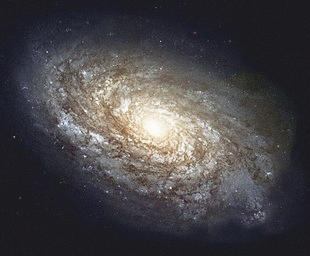

Jumlah citra : 80
Total PSNR rumus: 27.407968389648655 dB
Total PSNR library: 19.91659461468311 dB



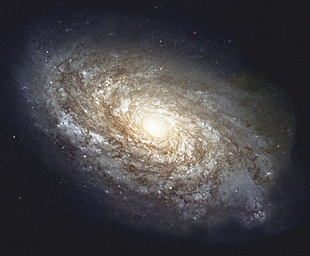

Jumlah citra : 100
Total PSNR rumus: 27.370931279516654 dB
Total PSNR library: 19.92196095594035 dB



In [104]:
iteration = [5,10,20,40,60,80,100]
for i in iteration:
  avg_psnr(original,cv_img[:i])


Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.

Hasil dari analisa diatas :
- **Nilai PSNR yang tinggi menunjukkan bahwa citra yang dihasilkan oleh pemrosesan lebih mendekati citra asli dan memiliki sedikit kesalahan atau distorsi.**
- **Nilai PSNR yang rendah menunjukkan bahwa citra hasil pemrosesan memiliki banyak kesalahan atau distorsi dibandingkan dengan citra asli, yang mengindikasikan kualitas yang buruk.**

4. **Buat** image masking untuk image berikut. Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya:

In [105]:
def mask_image(image,center,radius,operator):
  mask = np.zeros_like(image)
  cv.circle(mask, center, radius, (255, 255, 255), -1)
  match operator:
    case 'and':
      masked_image = cv.bitwise_and(image,mask)
    case 'or':
      masked_image = cv.bitwise_or(image,mask)
    case 'xor':
      masked_image = cv.bitwise_xor(image,mask)
    case 'not':
      masked_image = cv.bitwise_not(image,mask)
    case 'nand':
      inverted_mask = cv.bitwise_not(mask)
      masked_image = cv.bitwise_and(image,inverted_mask)

  final_frame = cv.hconcat((image, masked_image))
  cv2_imshow(final_frame)

AND


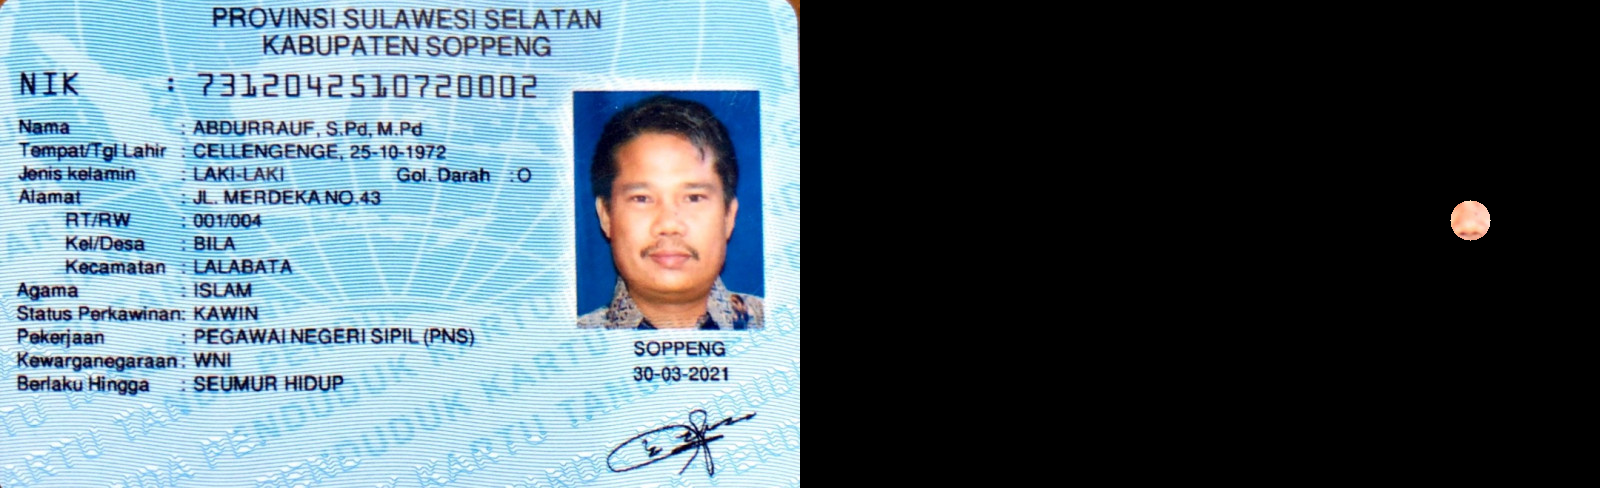

In [106]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp.png')
# plt.imshow(original)1
print("AND")
mask_image(original,(670,220),20,'and')

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

# Hasil masking menggunakan AND

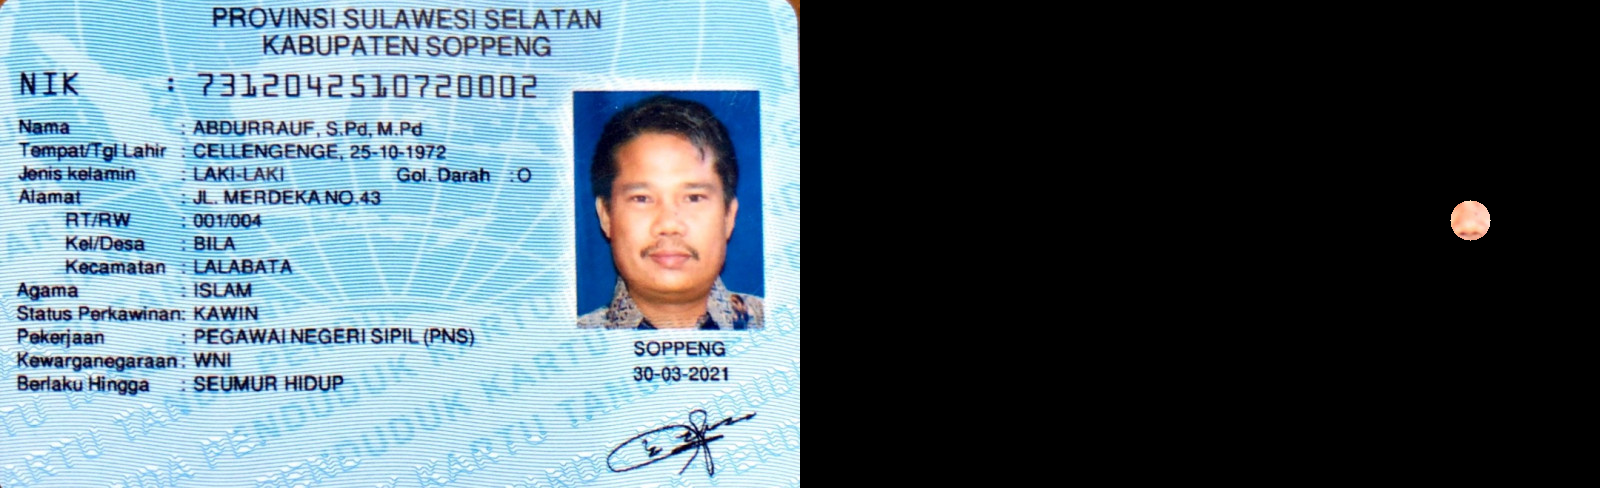

In [107]:
mask_image(original,(670,220),20,'and')

# Hasil masking menggunakan OR

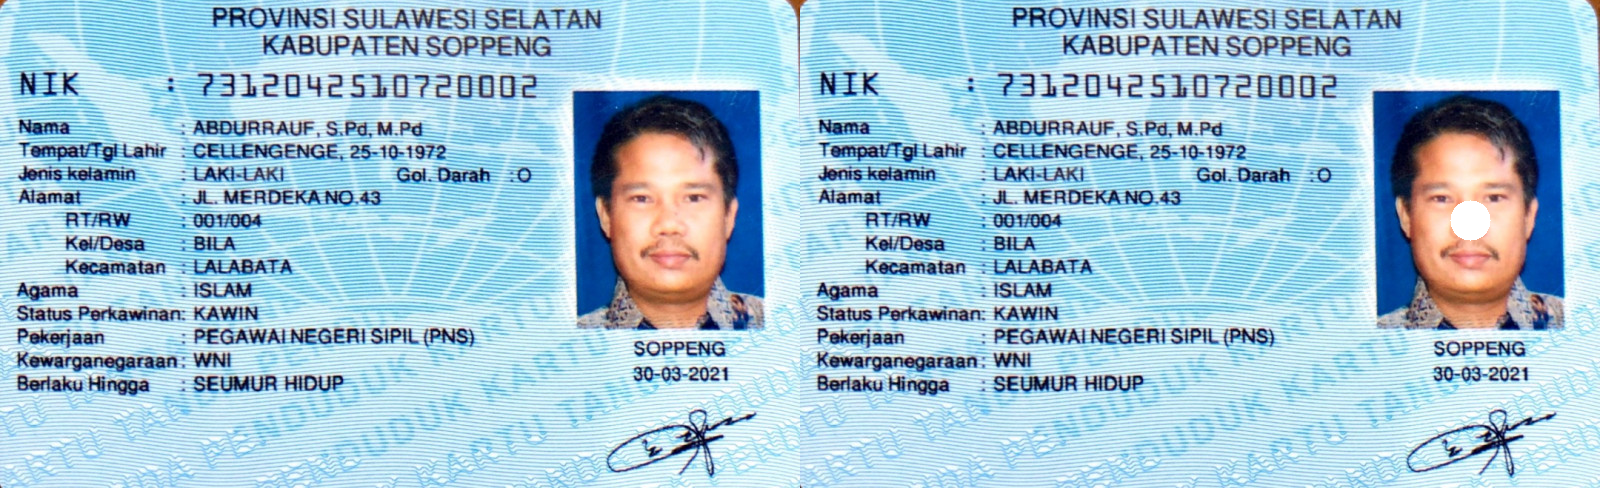

In [108]:
mask_image(original,(670,220),20,'or')

# Hasil masking menggunakan XOR

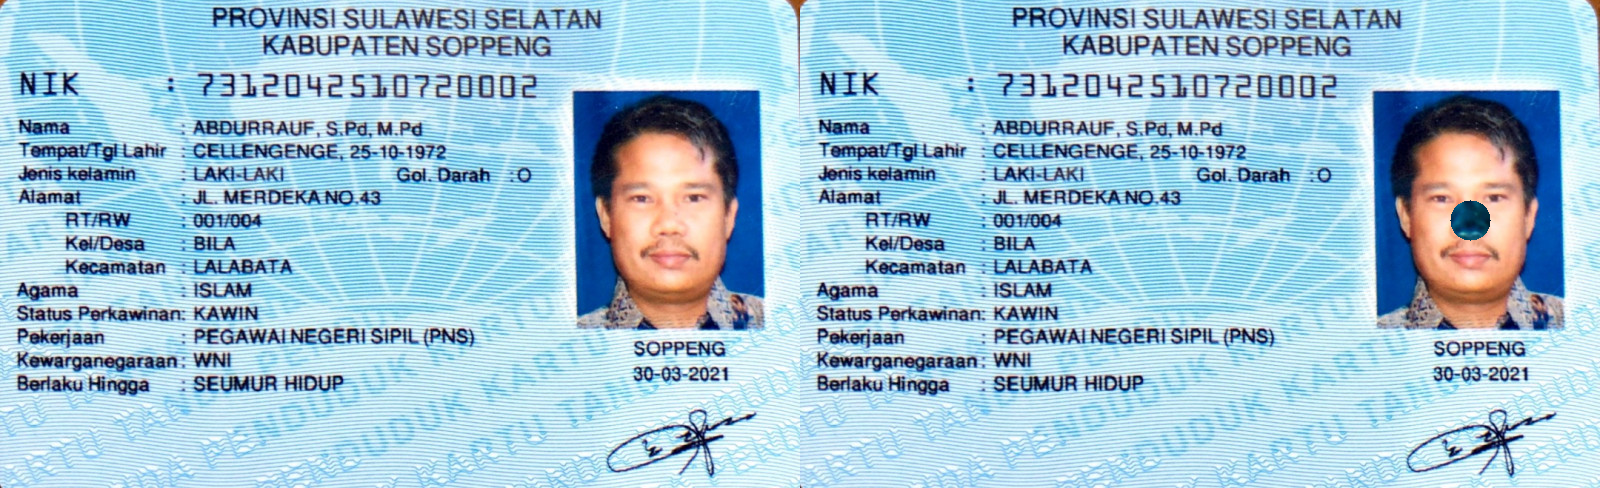

In [109]:
mask_image(original,(670,220),20,'xor')

# Hasil masking menggunakan NAND

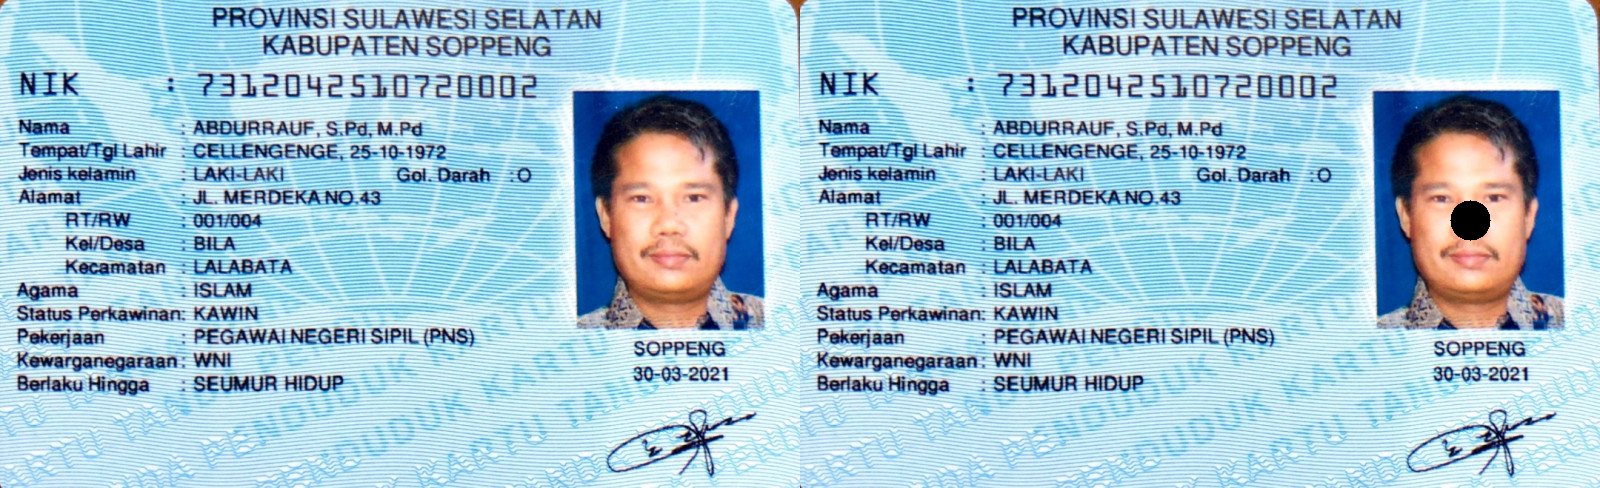

In [110]:
mask_image(original,(670,220),20,'nand')

# Hasil masking menggunakan NOT

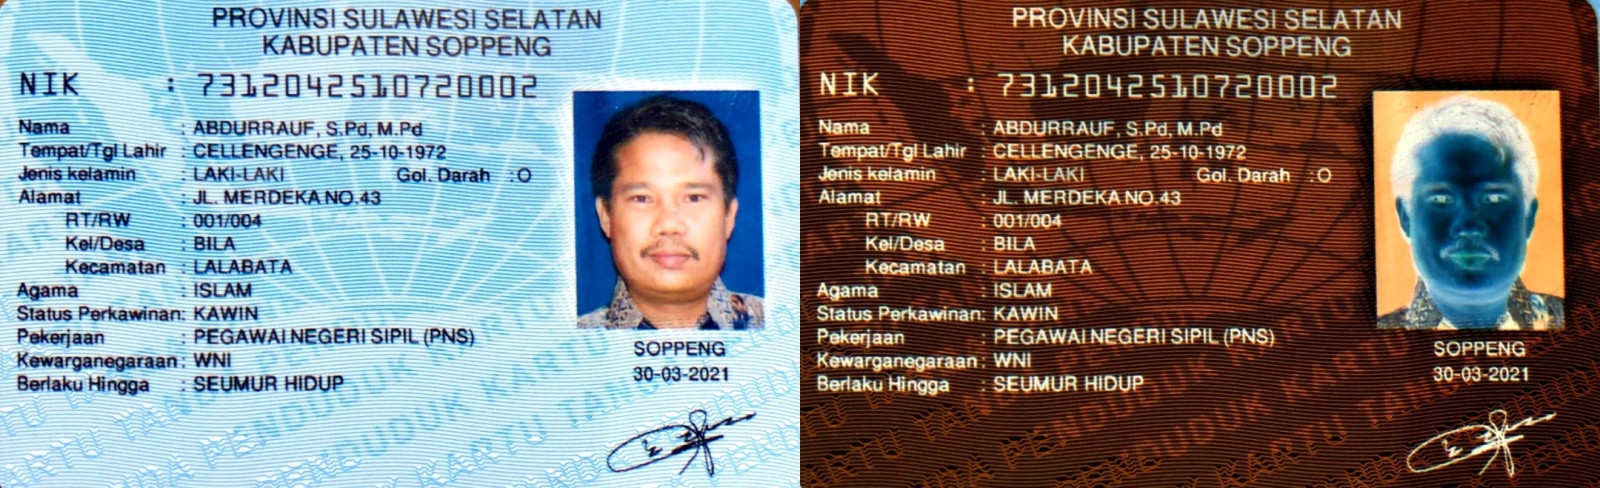

In [111]:
mask_image(original,(670,220),20,'not')

Omage masking merupakan teknik dalam pengolahan citra komputer untuk memisahkan bagian tertentu dari gambar. Dengan menggunakan masker, kita dapat memilih area berdasarkan warna, kecerahan, atau bentuknya. Metode umumnya adalah binary masking, di mana masker biner diterapkan pada gambar dengan operasi logika AND, OR, NAND, XOR, dan NOT.